### Shashwat Vaibhav 
#### MT21082

### `Assignment 2`
 
## This file contains codes specific for both the questions 1 and question 3

In [85]:
## importing libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.linalg import eig as eigen

print("Libraries have been imported")

Libraries have been imported


In [86]:
##just for the verification sake
a = [1, 2, 3]
np.exp(a)

array([ 2.71828183,  7.3890561 , 20.08553692])

## Q1

### Q1.a --> Generating samples

In [87]:
##Bernoulli --> binomial for n=1 is same as the bernoulli distribution
shape = (100, 2)
##As we have to create 100 samples each for the two classes consiting of two dimensions

sampleA = np.random.binomial(1, [0.5, 0.8], shape)
sampleB = np.random.binomial(1, [0.9, 0.2], shape)

print("Samples have been created!!")

Samples have been created!!


In [88]:
labelA = np.ones(100, int)
labelB = 2*np.ones(100, int)

DFA = pd.DataFrame(data = sampleA, columns=["d1", "d2"])
DFB = pd.DataFrame(data = sampleB, columns = ["d1", "d2"])

In [89]:
## LET'S add label 1 and 2, to both the samples A and B respectively
DFA['Label'] = labelA
DFB['Label'] = labelB

In [90]:
DFA.head()

,d1,d2,Label
0,1,1,1
1,1,1,1
2,1,1,1
3,0,1,1
4,0,1,1


In [91]:
DFB.head()

,d1,d2,Label
0,1,1,2
1,1,0,2
2,1,0,2
3,1,0,2
4,1,0,2


$\hat{\theta_{j_{MLE}}} = \frac{\sum x_{ij}}{N}$

`i varies from 1 to N, i.e, 0 to N-1`

### Generic MLE function 

In [92]:
## Let's create a generic function that returns MLE
## Theory has been described in the theory file attached.

def mle_estimate(DF, col,  n):
    s = 0
    for x in DF[col][:n]:
        s = s + x
    return s/n


### Q1. b 
### Let's do the tasks for sampleA
#### Split into train and test
#### And then plot MLE vs n on train data

In [93]:
## Dataframe DFA has already been created as DFA
X = DFA.drop('Label', axis=1)
Y = DFA['Label']

In [94]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.5, random_state=21)

In [95]:
print("train and test sets for class A, with label 1 has been created with size of train sample =", len(xtrain))

train and test sets for class A, with label 1 has been created with size of train sample = 50


In [96]:
## Let's store the MLE for sample size from 1 to n
## for theta_1
x_vals = np.arange(1, 51)

list_of_mle_d1 = []

for n in x_vals:
    list_of_mle_d1.append(mle_estimate(xtrain, 'd1', n))

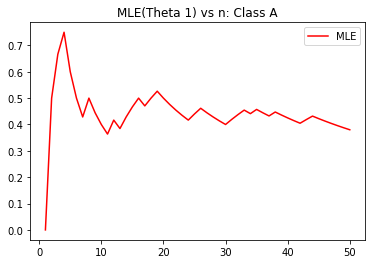

In [97]:
## plotting mle vs n for 1st dimension , d1 , for the training set of sample A

size = (10,6)
title = 'MLE(Theta 1) vs n: Class A'

plt.plot(x_vals, list_of_mle_d1, 'r', label = 'MLE')
plt.title(title)
plt.legend()

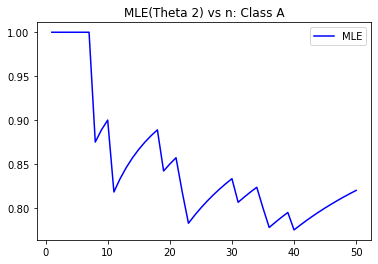

In [98]:
## MLE plot for theta_2 vs n
list_of_mle_d2 = []

for n in x_vals:
    list_of_mle_d2.append(mle_estimate(xtrain, 'd2', n))
    
## plotting mle vs n for 1st dimension , d2 , for the training set of sample A

size = (10,6)
title = 'MLE(Theta 2) vs n: Class A'

plt.plot(x_vals, list_of_mle_d2, 'b', label = 'MLE')
plt.title(title)
plt.legend()

### Q1. c 
### Let's do the tasks for sampleB
#### Split into train and test
#### And then plot MLE vs n on train data

train and test sets for class B, with label 2 has been created with size of train sample = 50


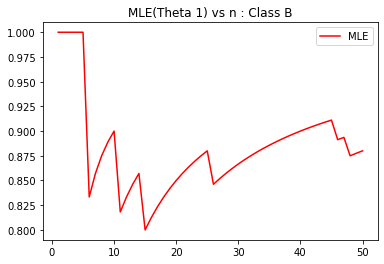

In [99]:
## DFB for class B samples already been created

Xb = DFB.drop('Label', axis=1)
Yb = DFB['Label']
# splitting

xbtrain, xbtest, ybtrain, ybtest = train_test_split(Xb, Yb, train_size=0.5, random_state=21)
print("train and test sets for class B, with label 2 has been created with size of train sample =", len(xtrain))

## MLE plot for theta_2 vs n
list_of_mle_d1 = []

for n in x_vals:
    list_of_mle_d1.append(mle_estimate(xbtrain, 'd1', n))
    
## plotting mle vs n for 1st dimension , d2 , for the training set of sample A

size = (10,6)
title = 'MLE(Theta 1) vs n : Class B'

plt.plot(x_vals, list_of_mle_d1, 'r', label = 'MLE')
plt.title(title)
plt.legend()

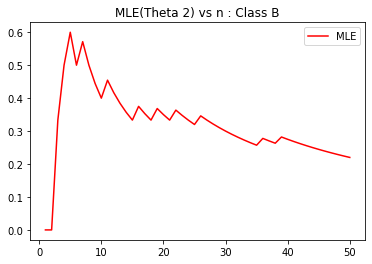

In [100]:
list_of_mle_d2 = []

for n in x_vals:
    list_of_mle_d2.append(mle_estimate(xbtrain, 'd2', n))
    
## plotting mle vs n for 1st dimension , d2 , for the training set of sample A

size = (10,6)
title = 'MLE(Theta 2) vs n : Class B'

plt.plot(x_vals, list_of_mle_d2, 'r', label = 'MLE')
plt.title(title)
plt.legend()

### Q1.d  plotting training samples

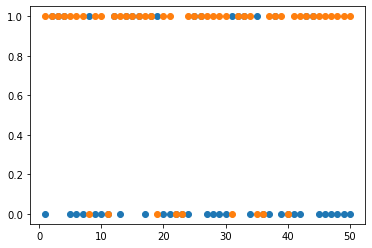

In [101]:
plt.scatter(x_vals, xtrain['d1'])
plt.scatter(x_vals, xtrain['d2'])

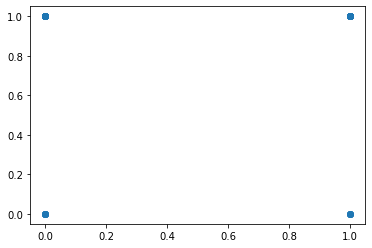

In [102]:
plt.scatter(xtrain['d1'], xtrain['d2'])

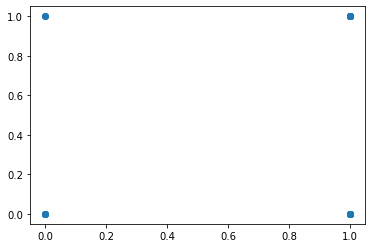

In [103]:
plt.scatter(xbtrain['d1'], xbtrain['d2'])

### Q1.e Creating a generic discriminant function for the classification purpose.

In [104]:
##for class A we have train and test splits as xtrain, xtest, ytrain, ytest
##for class B we have train and test splits as xbtrain, xbtest, ybtrain, ybtest
## DFA and DFB --> dataframes for class A and B

## again calculating mle estimate for thetaA and thetaB from our generic mle function
## thetaA_1 and thetaA_2
## thetaB_1 and thetaB_2

thetaA_1 = mle_estimate(xtrain,'d1', 50)
print(thetaA_1)
thetaA_2 = mle_estimate(xtrain,'d2', 50)
print(thetaA_2)
thetaB_1 = mle_estimate(xbtrain,'d1', 50)
print(thetaB_1)
thetaB_2 = mle_estimate(xbtrain,'d2', 50)
print(thetaB_2)

0.38
0.82
0.88
0.22


In [133]:
thetaA = np.array([thetaA_1,thetaA_2])
thetaB = np.array([thetaB_1,thetaB_2])

print(thetaA)
print("")
print(thetaB)

[0.38 0.82]

[0.88 0.22]


In [126]:
## let's define now the discriminant
def discriminant(test_instance, thetaA, thetaB):
    p =  np.dot(test_instance.reshape(2,1).T , np.log(thetaA)) 
    q = np.dot((1-test_instance).reshape(2,1).T , np.log(1-thetaA))
    r = np.dot(test_instance.reshape(2,1).T , np.log(thetaB)) 
    s = np.dot((1-test_instance).reshape(2,1).T , np.log(1-thetaB))
    
    return ((+q)/(r+s))[0]


In [107]:
#for instance in xtest.values:
 #   print(instance)

In [127]:
##we have test and train instances as:
## xtest, ytest --> class A
## xbtest, ybtest --> class B

pred_A = []
pred_B = []


for instance in xtest.values:
    i = np.array(instance)
    if discriminant(i, thetaA, thetaB)> 0:
        pred_A.append(1)
    else:
        pred_A.append(2)

for instance in xbtest.values:
    i=np.array(instance)
    if discriminant(i, thetaA, thetaB)>0:
        pred_B.append(2)
    else:
        pred_B.append(1)


In [128]:
def accuracy(ypred, ytest):
    count=0
    total = len(ytest)
    for i in range(len(ytest)):
        if ytest[i]==ypred[i]:
            count +=1
    return count/total

In [131]:

print("Accuracy for class A test samples:", accuracy(np.array(pred_A), np.array(ytest)))

print("Accuracy for class B test samples:", accuracy(np.array(pred_B), np.array(ybtest)))

Accuracy for class A test samples: 0.64
Accuracy for class B test samples: 0.76


## Q3 PCA

### Q3.C 

In [111]:
#Creating a generic function to centralize data
def centralize(matrix:np.ndarray)->np.ndarray:
    ##finding mean
    column_wise=1
    mean_vec =  np.mean(matrix.transpose(), axis = column_wise)
    centralized_mat = matrix - mean_vec
    
    return centralized_mat
    

In [112]:
d2_list= [[3,2],[5,7]]
X = np.array(d2_list)
##created the matrix itself
## now cetralizing
Xcent = centralize(X)
cov_mat = np.cov(Xcent.transpose())

eigen_val_vec = eigen(cov_mat)
##unpacking now into values and vectors
egval, egvec = eigen_val_vec

print("The eigenVectors are:\n", egvec)

The eigenVectors are:
 [[-0.92847669 -0.37139068]
 [ 0.37139068 -0.92847669]]


In [113]:
## Computing the encoding, Y = U' Centralized(X), where U is the eigen vectors

Y = np.dot(egvec, Xcent)
print(Y)

[[ 0.55708601  1.39271504]
 [-1.29986737 -3.24966842]]


In [114]:
## computing UY + mean(X)
mean_vec =  np.mean(X.transpose(), axis = 1)
print("Mean Vector is:")
print(mean_vec)

##matrix multiplication with encoding Y
UY = np.matmul(egvec, Y)
P= UY + mean_vec
P

Mean Vector is:
[4.  4.5]


array([[3.96551724, 4.4137931 ],
       [5.4137931 , 8.03448276]])

In [115]:
##MSE and rmse calculation
esq = 0
for r in range(len(P)):
    for c in range(len(P)):
        e = P[r][c]-X[r][c]
        esq += e**2
print("MSE:", esq/4)
print("rmse:", np.sqrt(esq/4))

MSE: 2.0000000000000004
rmse: 1.4142135623730951


### Q3. d

In [116]:
## generating multivariate normal samples
N = 100
mean_vals = [2, 3]
covar_mat = [
    [3,0],
    [0,3]
    
]

In [117]:
##generate samples
samples = np.random.multivariate_normal(mean_vals, covar_mat, N)
samples.shape

(100, 2)

In [118]:
##centralizing sample
s_cent = centralize(samples)
s_cent.shape

(100, 2)

In [119]:
mat_cov = np.cov(s_cent.transpose())
mat_cov.shape

(2, 2)

In [120]:
##U --> eigen vectors
E = eigen(mat_cov)

In [121]:
##tuple unpacking
egvals, U = E

In [122]:
##Y =U'X
##encoding has been done
Y = np.matmul(s_cent, U.T)
Y.shape
U.shape

(2, 2)

In [123]:
##UY + mean(X)
mean_vec =  np.mean(samples.transpose(), axis = 1)
print("Mean Vector is:")
print(mean_vec)



Mean Vector is:
[1.98782199 2.71400647]


In [124]:
D = np.matmul(Y,U)+mean_vec

In [125]:
##MSE calculation for the gaussian
esq = 0
for r in range(len(P)):
    for c in range(len(P)):
        e = P[r][c]-X[r][c]
        esq += e**2
print("MSE:", esq/N)
print("rmse:", np.sqrt(esq/N))

MSE: 0.08000000000000002
rmse: 0.28284271247461906
